<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/overfitting_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### SOLUTION TO REDUCE OVERFITTING OF A MODEL ###

 1. Reducing network layers or units
 2. Weight Regularization
 3. Dropout


In [1]:
import tensorflow
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

In [2]:
# DATASET - Collections of movie reviews classified with bad/good sentiment labels

def vectorize_sequences(sequences, dimension=10000):
  """
  One hot conversion : int to vector
  """
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
partial_x_train = x_train[10000:]
x_val = x_train[:10000]

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
partial_y_train = y_train[10000:]
y_val = y_train[:10000]

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# MODEL DEFINITION - SOLUTION 1 : Reduce numbers of neurons/layers to prevent overfitting

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 4s 68ms/step - loss: 0.6589 - accuracy: 0.6082 - val_loss: 0.6268 - val_accuracy: 0.6621
Epoch 2/30
30/30 [==============================] - 1s 49ms/step - loss: 0.5999 - accuracy: 0.7281 - val_loss: 0.5826 - val_accuracy: 0.7297
Epoch 3/30
30/30 [==============================] - 1s 30ms/step - loss: 0.5547 - accuracy: 0.7857 - val_loss: 0.5474 - val_accuracy: 0.7975
Epoch 4/30
30/30 [==============================] - 1s 34ms/step - loss: 0.5170 - accuracy: 0.8305 - val_loss: 0.5208 - val_accuracy: 0.7852
Epoch 5/30
30/30 [==============================] - 1s 29ms/step - loss: 0.4841 - accuracy: 0.8546 - val_loss: 0.4944 - val_accuracy: 0.8294
Epoch 6/30
30/30 [==============================] - 1s 29ms/step - loss: 0.4543 - accuracy: 0.8775 - val_loss: 0.4731 - val_accuracy: 0.8428
Epoch 7/30
30/30 [==============================] - 1s 29ms/step - loss: 0.4251 - accuracy: 0.8956 - val_loss: 0.4514 - val_accuracy: 0.8607
Epoch 8/30
30

In [ ]:
# MODEL DEFINITION - SOLUTION 2 : Add weight regularization to prevent overfitting.

units = 16

model = models.Sequential()
model.add(layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(10000,)))
model.add(layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, validation_data=(x_val, y_val))

# Different weight regularizers available
# regularizers.l2(0.001)
# regularizers.l1_l2(l1=0.001, l2=0.001)

In [ ]:
# MODEL DEFINITION - SOLUTION 3 : Add dropout to prevent overfitting.

units = 16

model = models.Sequential()
model.add(layers.Dense(units, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 2s 35ms/step - loss: 0.6263 - accuracy: 0.6402 - val_loss: 0.5149 - val_accuracy: 0.8539
Epoch 2/30
30/30 [==============================] - 1s 20ms/step - loss: 0.5053 - accuracy: 0.7729 - val_loss: 0.4024 - val_accuracy: 0.8768
Epoch 3/30
30/30 [==============================] - 1s 20ms/step - loss: 0.4372 - accuracy: 0.8118 - val_loss: 0.3404 - val_accuracy: 0.8855
Epoch 4/30
30/30 [==============================] - 1s 21ms/step - loss: 0.3769 - accuracy: 0.8535 - val_loss: 0.3020 - val_accuracy: 0.8883
Epoch 5/30
30/30 [==============================] - 1s 21ms/step - loss: 0.3303 - accuracy: 0.8754 - val_loss: 0.2873 - val_accuracy: 0.8896
Epoch 6/30
30/30 [==============================] - 1s 21ms/step - loss: 0.2949 - accuracy: 0.8899 - val_loss: 0.2866 - val_accuracy: 0.8828
Epoch 7/30
30/30 [==============================] - 1s 21ms/step - loss: 0.2688 - accuracy: 0.9042 - val_loss: 0.2736 - val_accuracy: 0.8897
Epoch 8/30
30

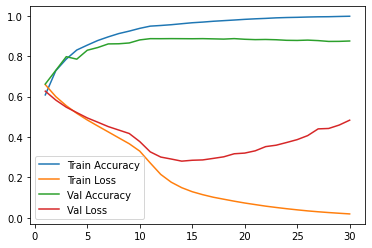

In [4]:
# LOG TRAINING RESULTS

history_dict = history.history
loss = history_dict['loss']
acc = history_dict['accuracy']
val_loss = history_dict["val_loss"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, 31)

plt.plot(epochs, acc, label="Train Accuracy")
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_acc, label="Val Accuracy")
plt.plot(epochs, val_loss, label="Val Loss")
plt.legend()
plt.show()

In [5]:
# EVALUATION

score = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(score)

782/782 [==============================] - 2s 2ms/step - loss: 0.5207 - accuracy: 0.8616
['loss', 'accuracy']
[0.5206989049911499, 0.8615999817848206]
